In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [2]:
import patsy

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from scipy import stats

In [5]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

In [6]:
data = {"y": y, "x1": x1, "x2": x2}

In [7]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [8]:
df_data = pd.DataFrame(data)

In [9]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")

In [10]:
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [11]:
model = sm.OLS(y, X)

In [12]:
result = model.fit()

In [13]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.665335e-15
dtype: float64

In [14]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)

In [15]:
result = model.fit()

In [16]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.665335e-15
dtype: float64

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.561e+28
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           6.41e-29
Time:                        10:20:56   Log-Likelihood:                 153.47
No. Observations:                   5   AIC:                            -300.9
Df Residuals:                       2   BIC:                            -302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   4.08e-14  -1.36e+13      0.0

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})

In [19]:
def y_true(x1, x2):
    return 1+ 2 * x1 + 3 * x2 + 4 * x1 * x2

In [20]:
data["y_true"] = y_true(x1, x2)

In [21]:
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e

In [22]:
model = smf.ols("y ~ x1 + x2", data)

In [23]:
result = model.fit()

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     64.40
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.59e-18
Time:                        10:20:58   Log-Likelihood:                -284.83
No. Observations:                 100   AIC:                             575.7
Df Residuals:                      97   BIC:                             583.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8113      0.428      4.235      0.0

In [25]:
result.resid.head()

0   -0.410272
1    0.173608
2    0.243756
3   -0.086585
4   -2.666373
dtype: float64

In [26]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.7403705201274418

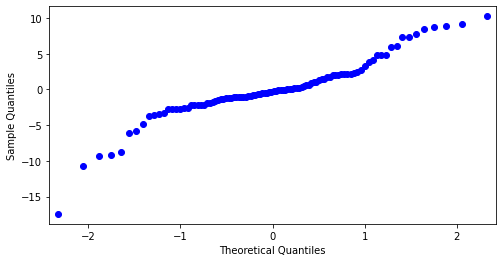

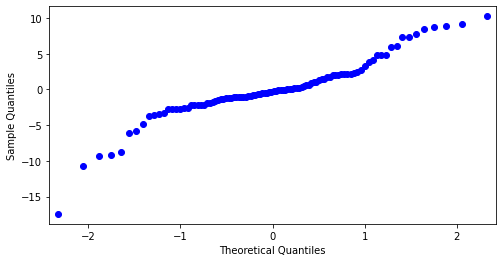

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [28]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [29]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4918.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.33e-105
Time:                        10:20:59   Log-Likelihood:                -75.010
No. Observations:                 100   AIC:                             158.0
Df Residuals:                      96   BIC:                             168.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0396      0.054     19.384      0.0

In [30]:
z, p = stats.normaltest(result.fittedvalues.values)
p

2.8629428300121086e-06

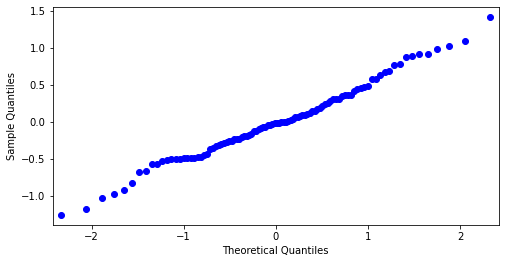

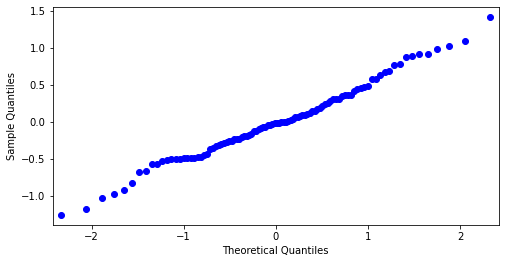

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [32]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [33]:
y_pred = result.predict(new_data)

In [34]:
df = sm.datasets.get_rdataset("iris").data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [38]:
df_subset.Species = df_subset.Species.map({"versicolor": 1,"virginica": 0})

In [39]:
df_subset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [40]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
"Sepal.Width": "Sepal_Width",
"Petal.Length": "Petal_Length",
"Petal.Width": "Petal_Width"},inplace=True)

In [41]:
df_subset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [42]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [43]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [44]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.8517
Time:                        10:21:04   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [45]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,"Petal_Width": np.random.randn(20)*0.5 + 1.7})

In [46]:
df_new["P-Species"] = result.predict(df_new)

In [47]:
df_new["P-Species"].head(3)

0    0.945496
1    0.999994
2    0.990144
Name: P-Species, dtype: float64

In [48]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [49]:
df_new["Species"].head(3)

0    1
1    1
2    1
Name: Species, dtype: int64

In [50]:
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

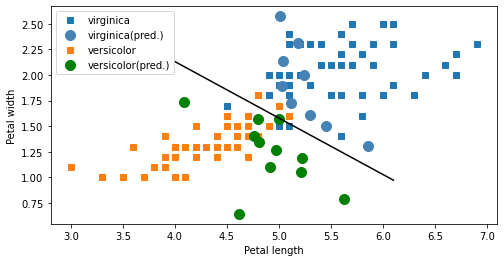

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# species virginica
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
df_subset[df_subset.Species == 0].Petal_Width.values,
's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
df_new[df_new.Species == 0].Petal_Width.values,
'o', markersize=10, color="steelblue", label='virginica(pred.)')
 # species versicolor
ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
df_subset[df_subset.Species == 1].Petal_Width.values,
's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
df_new[df_new.Species == 1].Petal_Width.values,
'o', markersize=10, color="green", label='versicolor(pred.)')
# boundary line
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()